<a href="https://colab.research.google.com/github/wanruu/CS5487/blob/main/ml_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

import matplotlib.pyplot as plt
import tqdm

In [2]:
vecs=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_vec.txt')
labels=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_labels.txt')

In [ ]:
vecs.shape

(4000, 784)

In [ ]:
labels.shape

(4000,)

In [ ]:
#trail 1
train_data=vecs[:2000]
test_data=vecs[2000:]
train_label=labels[:2000]
test_label=labels[2000:]

In [3]:
#trail 2
train_data=vecs[2000:]
test_data=vecs[:2000]
train_label=labels[2000:]
test_label=labels[:2000]

In [ ]:
test_data.shape

(2000, 784)

In [4]:
train_data, train_label = shuffle(train_data, train_label, random_state=123)
test_data, test_label = shuffle(test_data, test_label, random_state=123)

trail 2 

In [5]:
classifier = svm.SVC(C=4,kernel='rbf')
classifier.fit(train_data, train_label)
print('rbf')
print("train:", classifier.score(train_data, train_label))
print("test:", classifier.score(test_data, test_label))


rbf
train: 1.0
test: 0.9385


In [6]:
classifier = svm.SVC(C=10,kernel='linear')
classifier.fit(train_data, train_label)
print('linear')
print("train:", classifier.score(train_data, train_label))
print("test:", classifier.score(test_data, test_label))

linear
train: 1.0
test: 0.8995


In [7]:
classifier = svm.SVC(C=10,kernel='poly')
classifier.fit(train_data, train_label)
print('poly')
print("train:", classifier.score(train_data, train_label))
print("test:", classifier.score(test_data, test_label))

poly
train: 0.9995
test: 0.9075


In [10]:
classifier = svm.SVC(C=0.4,kernel='sigmoid')
classifier.fit(train_data, train_label)
print('sigmoid')
print("train:", classifier.score(train_data, train_label))
print("test:", classifier.score(test_data, test_label))

sigmoid
train: 0.8935
test: 0.862


trail 1

100%|██████████| 40/40 [03:17<00:00,  4.95s/it]


<function matplotlib.pyplot.show(*args, **kw)>

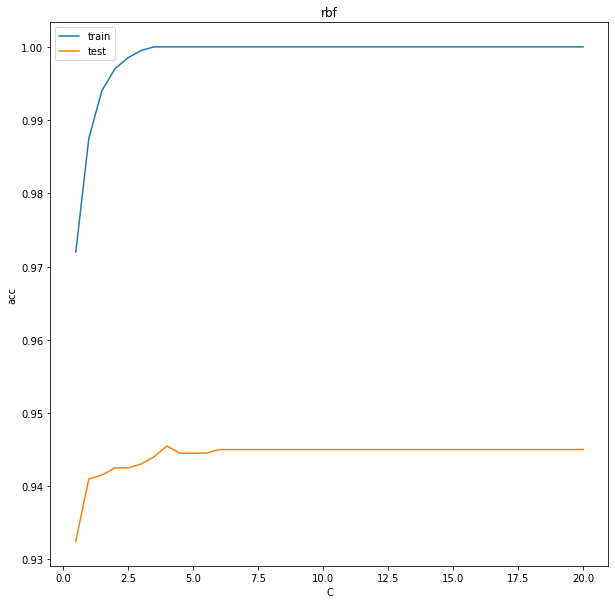

In [ ]:
c_rbf=[]
train_acc_rbf=[]
test_acc_rbf=[]
for i in tqdm.tqdm(range(40)):
  c=i/2+0.5
  classifier = svm.SVC(C=c,kernel='rbf')
  classifier.fit(train_data, train_label)
  c_rbf.append(c)
  train_acc_rbf.append(classifier.score(train_data, train_label))
  test_acc_rbf.append(classifier.score(test_data, test_label))
plt.figure(figsize=(10, 10))
plt.plot(c_rbf,train_acc_rbf,label='train')
plt.plot(c_rbf,test_acc_rbf,label='test')
plt.xlabel('C')
plt.ylabel('acc')
plt.title('rbf')
plt.legend()
plt.show

In [ ]:
#rbf best c
idx=test_acc_rbf.index(max(test_acc_rbf))
[c_rbf[idx],train_acc_rbf[idx],max(test_acc_rbf)]

[4.0, 1.0, 0.9455]

100%|██████████| 40/40 [01:05<00:00,  1.63s/it]


[10.0, 0.9995, 0.92]


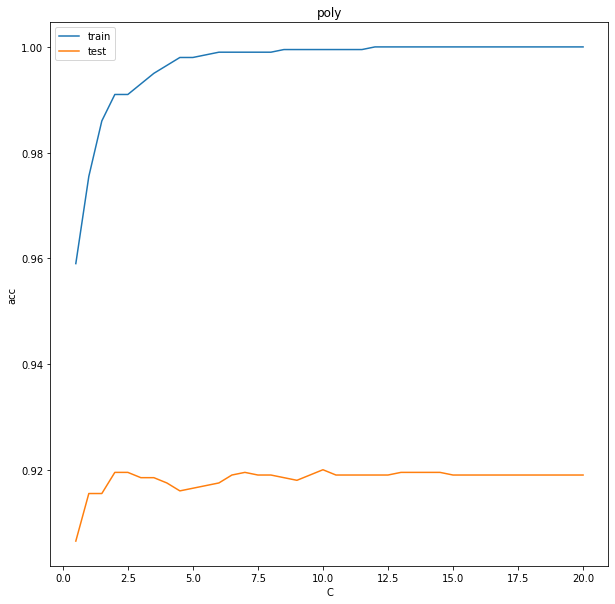

In [ ]:
c_poly=[]
train_acc_poly=[]
test_acc_poly=[]
for i in tqdm.tqdm(range(40)):
  c=i/2+0.5
  classifier = svm.SVC(C=c,kernel='poly')
  classifier.fit(train_data, train_label)
  c_poly.append(c)
  train_acc_poly.append(classifier.score(train_data, train_label))
  test_acc_poly.append(classifier.score(test_data, test_label))
plt.figure(figsize=(10, 10))
plt.plot(c_poly,train_acc_poly,label='train')
plt.plot(c_poly,test_acc_poly,label='test')
plt.xlabel('C')
plt.ylabel('acc')
plt.title('poly')
plt.legend()
plt.show
#best c
idx=test_acc_poly.index(max(test_acc_poly))
print([c_poly[idx],train_acc_poly[idx],max(test_acc_poly)])

100%|██████████| 40/40 [01:27<00:00,  2.19s/it]


[0.4, 0.883, 0.8815]


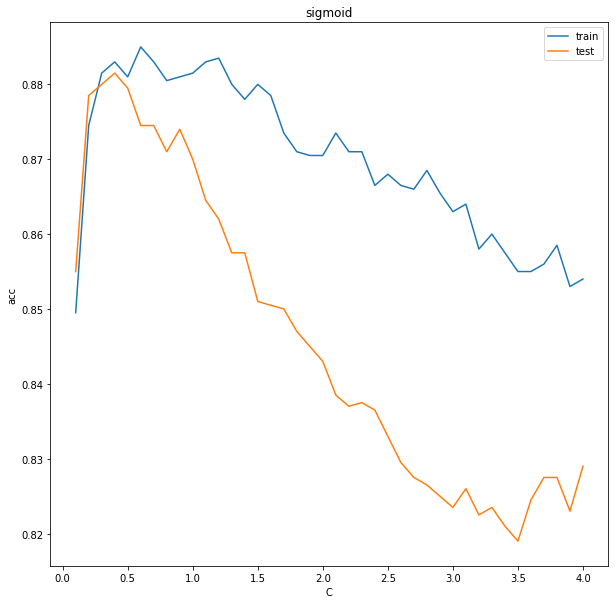

In [ ]:
c_sigmoid=[]
train_acc_sigmoid=[]
test_acc_sigmoid=[]
for i in tqdm.tqdm(range(40)):
  c=i/10+0.1
  classifier = svm.SVC(C=c,kernel='sigmoid')
  classifier.fit(train_data, train_label)
  c_sigmoid.append(c)
  train_acc_sigmoid.append(classifier.score(train_data, train_label))
  test_acc_sigmoid.append(classifier.score(test_data, test_label))
plt.figure(figsize=(10, 10))
plt.plot(c_sigmoid,train_acc_sigmoid,label='train')
plt.plot(c_sigmoid,test_acc_sigmoid,label='test')
plt.xlabel('C')
plt.ylabel('acc')
plt.title('sigmoid')
plt.legend()
plt.show

#best c
idx=test_acc_sigmoid.index(max(test_acc_sigmoid))
print([c_sigmoid[idx],train_acc_sigmoid[idx],max(test_acc_sigmoid)])

100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


[0.5, 1.0, 0.901]


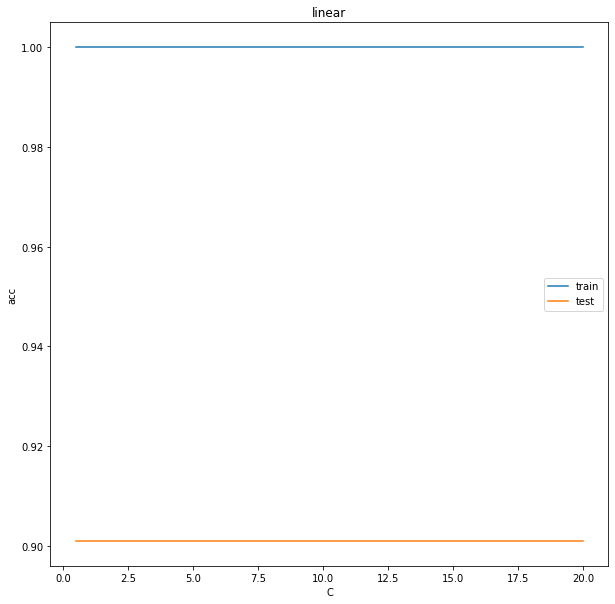

In [ ]:
c_linear=[]
train_acc_linear=[]
test_acc_linear=[]
for i in tqdm.tqdm(range(40)):
  c=i/2+0.5
  classifier = svm.SVC(C=c,kernel='linear')
  classifier.fit(train_data, train_label)
  c_linear.append(c)
  train_acc_linear.append(classifier.score(train_data, train_label))
  test_acc_linear.append(classifier.score(test_data, test_label))
plt.figure(figsize=(10, 10))
plt.plot(c_linear,train_acc_linear,label='train')
plt.plot(c_linear,test_acc_linear,label='test')
plt.xlabel('C')
plt.ylabel('acc')
plt.title('linear')
plt.legend()
plt.show

#best c
idx=test_acc_linear.index(max(test_acc_linear))
print([c_linear[idx],train_acc_linear[idx],max(test_acc_linear)])